# Лабораторная работа № 3. Титаник

На основе данных конкурса [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic) постройте модель логистической регресси для предсказания выживших пассажиров.

## Задание

1. Постройте классификатор используя доступные числовые признаки.
2. Оцените точность и полноту классификации. Постройте график ROC кривой.
3. Расширьте пространство признаков на основе имени пассажира и оцените качество новой модели.

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
%pylab inline

data = pd.read_csv('train.csv', index_col=0)
data.head()


Populating the interactive namespace from numpy and matplotlib


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [168]:
data.shape

(891, 11)

In [169]:
data=data.dropna() 

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [170]:
data.shape

(183, 11)

Точность: 0.7272727272727273
Полнота: 0.96


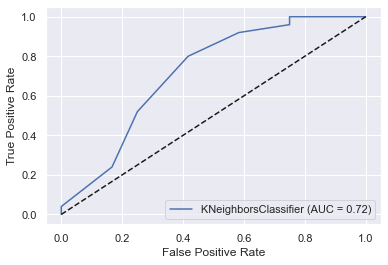

In [171]:
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.model_selection import train_test_split  
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score 
from sklearn.preprocessing import LabelEncoder  
from sklearn.metrics import plot_roc_curve

labelencoder = LabelEncoder()
data['Sex'] = labelencoder.fit_transform(data['Sex']) #Преобразование текстовых данных в числовые

X = np.array(data[['Pclass','Sex','Age','Parch','Parch','SibSp','Fare']])
Y = np.array(data['Survived'])
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,stratify=Y) #разбиение на наборы

# обучение
model = KNeighborsClassifier(n_neighbors=15).fit(x_train, y_train)

#точность и полнота модели
y_pred = model.predict(x_test) 
print('Точность:', precision_score(y_test, y_pred))
print('Полнота:', recall_score(y_test, y_pred))

#ROC кривая
disp1 = plot_roc_curve(model, x_test, y_test)
disp1.ax_.plot([0, 1], [0, 1], 'k--');

In [172]:
data['Prefix'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

data['Prefix'].value_counts()

Mr          81
Miss        44
Mrs         38
Master       7
Dr           3
Major        2
Mlle         2
Mme          1
Capt         1
Col          1
Lady         1
Countess     1
Sir          1
Name: Prefix, dtype: int64

In [173]:
# Классификация по префиксу: Mr-0, Miss-1, Mrs-2, Другие-3
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

data['Prefix'] = data['Prefix'].map(title_mapping)

train_.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
PassengerId,,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2
7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,0
11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,S,1
12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,S,1


Точность: 0.7575757575757576
Полнота: 1.0


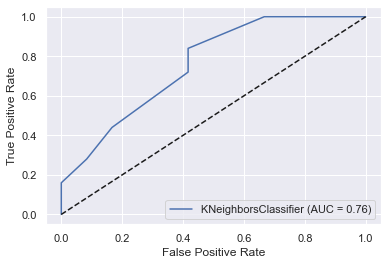

In [174]:
from sklearn import preprocessing
X = np.array(data[['Pclass','Sex','Age','Parch','Parch','SibSp','Fare','Prefix']])
Y = np.array(data['Survived'])
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,stratify=Y) #разбиение на наборы

# обучение
from sklearn.linear_model import LogisticRegression
model = KNeighborsClassifier(n_neighbors=15).fit(x_train, y_train)

#точность и полнота модели
y_pred = model.predict(x_test) 
print('Точность:', precision_score(y_test, y_pred))
print('Полнота:', recall_score(y_test, y_pred))

#ROC кривая
disp1 = plot_roc_curve(model, x_test, y_test)
disp1.ax_.plot([0, 1], [0, 1], 'k--');